# Week 5 Lecture

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [3]:
print(f'The type of iris is {type(iris)}')

The type of iris is <class 'sklearn.utils.Bunch'>


In [7]:
import pandas as pd
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df.drop(['target'], axis=1, inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.columns = ['sLength', 'sWidth', 'pLength', 'pWidth', 'Species']
df.head()

,sLength,sWidth,pLength,pWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.to_csv('data/iris.csv', index=False)
df = pd.read_csv('data/iris.csv')
df.head()

,sLength,sWidth,pLength,pWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df['Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

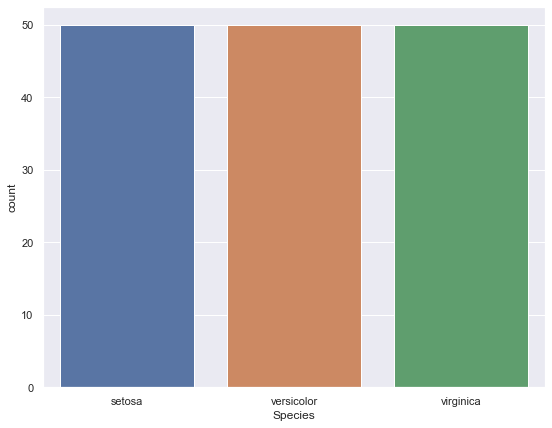

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(9,7)})

sns.countplot(x='Species', data=df)
plt.show()

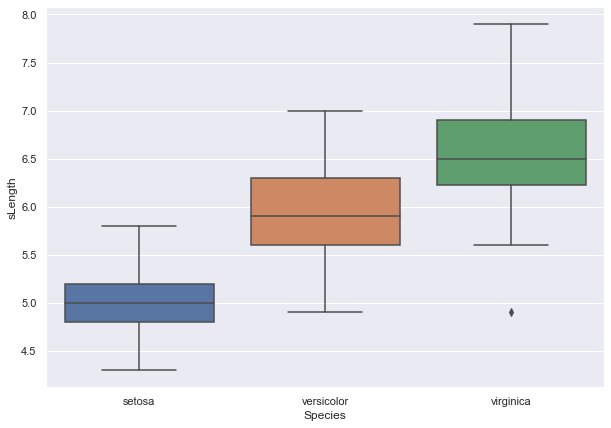

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='Species', y='sLength')

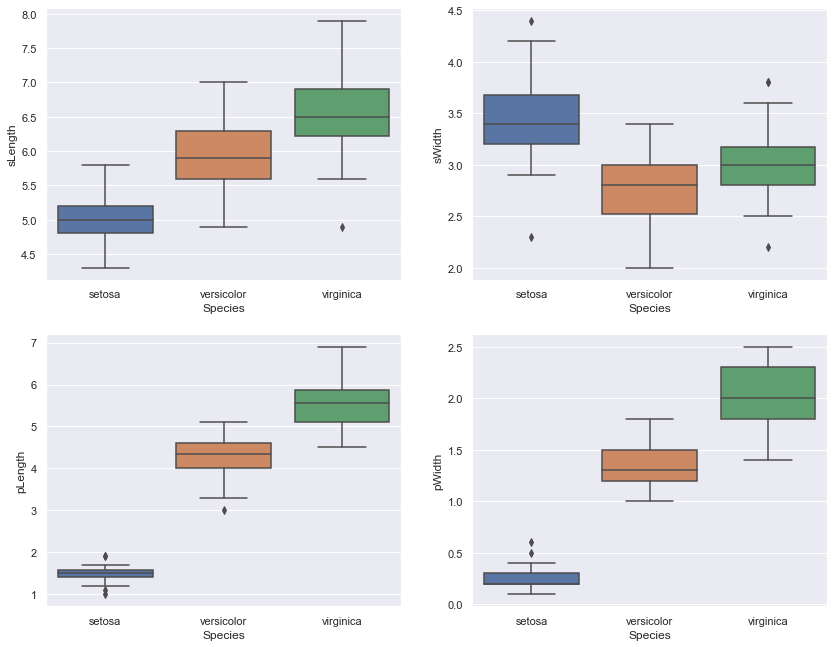

In [17]:
plt.figure(figsize=(14,11))

plt.subplot(2,2,1)
sns.boxplot(x='Species', y='sLength', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='Species', y='sWidth', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='Species', y='pLength', data=df)

plt.subplot(2,2,4)
sns.boxplot(x='Species', y='pWidth',data=df)

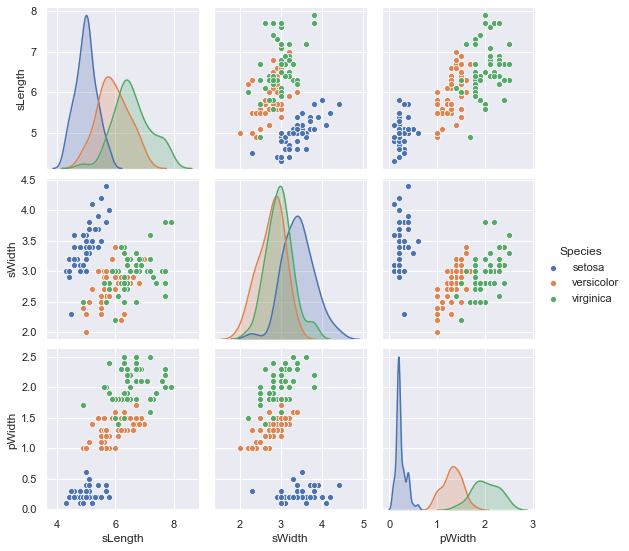

In [18]:
col_names = ['sLength', 'sWidth', 'pWidth', 'Species']
sns.pairplot(df[col_names], hue='Species')
plt.show()

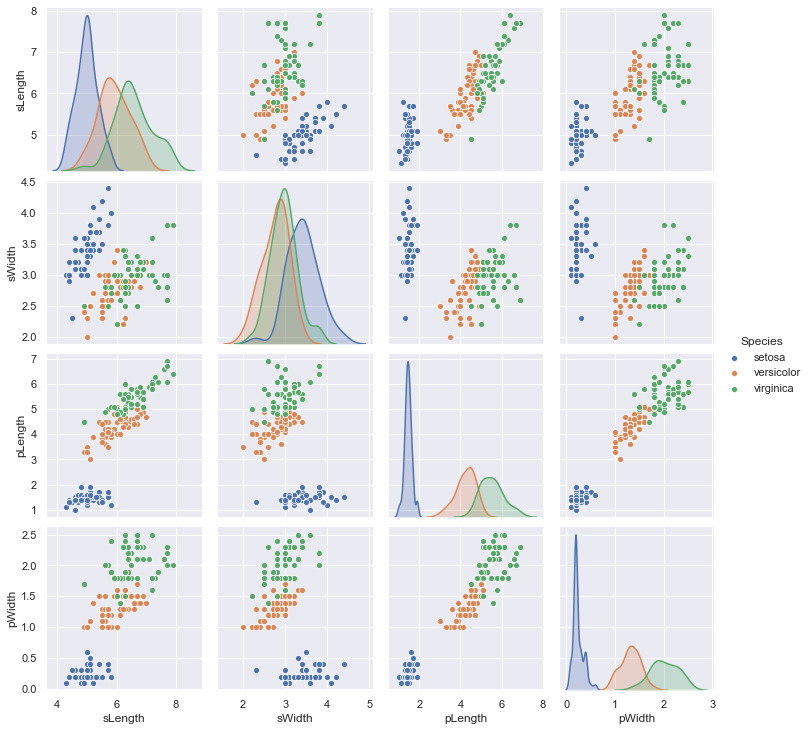

In [19]:
sns.pairplot(df, hue='Species')
plt.show()

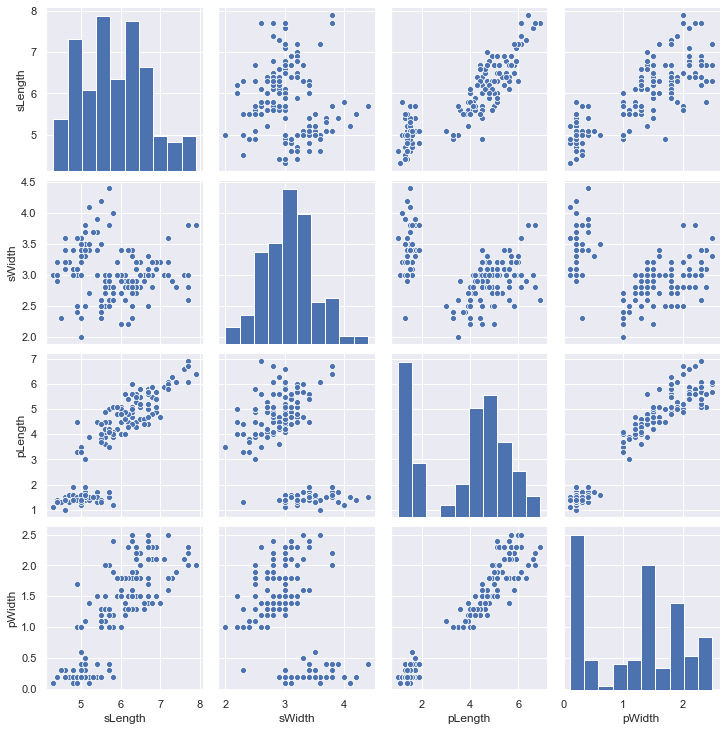

In [20]:
sns.pairplot(df)


[Text(0, 0.5, 'Petal Width'), Text(0.5, 0, 'Petal Length')]

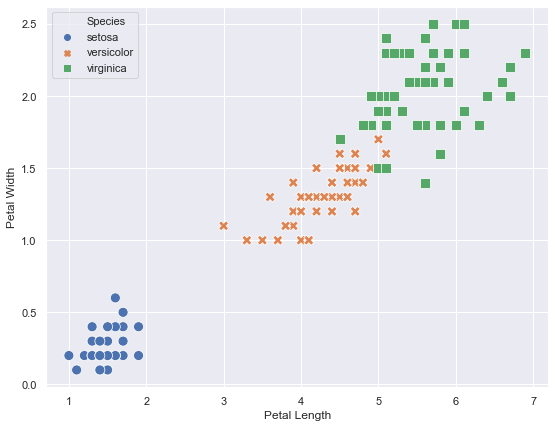

In [22]:
ax = sns.scatterplot(x='pLength', y='pWidth', data=df, hue='Species', style='Species' ,s=100)
ax.set(xlabel='Petal Length', ylabel ='Petal Width')

In [23]:
cor_matrix = df.corr()
cor_matrix

,sLength,sWidth,pLength,pWidth
sLength,1.000000,-0.117570,0.871754,0.817941
sWidth,-0.117570,1.000000,-0.428440,-0.366126
pLength,0.871754,-0.428440,1.000000,0.962865
pWidth,0.817941,-0.366126,0.962865,1.000000


[Text(0, 0.5, 'Sepal Width'), Text(0.5, 0, 'Sepal Length')]

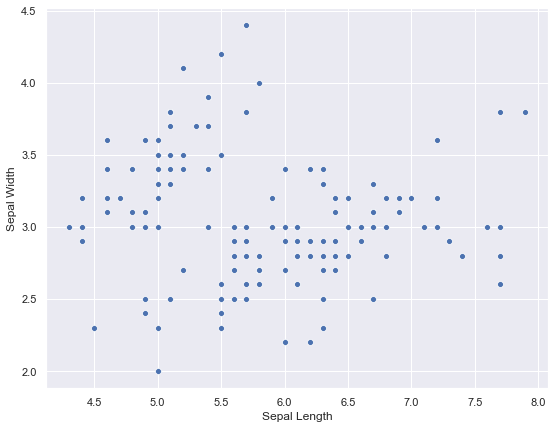

In [24]:
ax = sns.scatterplot(x='sLength', y='sWidth', data=df)
ax.set(xlabel='Sepal Length', ylabel='Sepal Width')

[Text(0, 0.5, 'Petal Width'), Text(0.5, 0, 'Petal Length')]

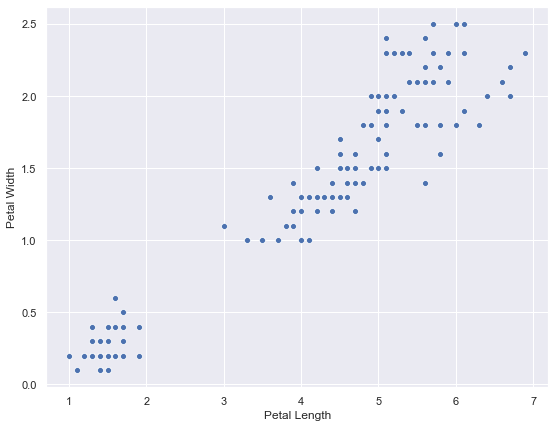

In [25]:
ax = sns.scatterplot(x='pLength', y='pWidth', data=df)
ax.set(xlabel='Petal Length', ylabel='Petal Width')

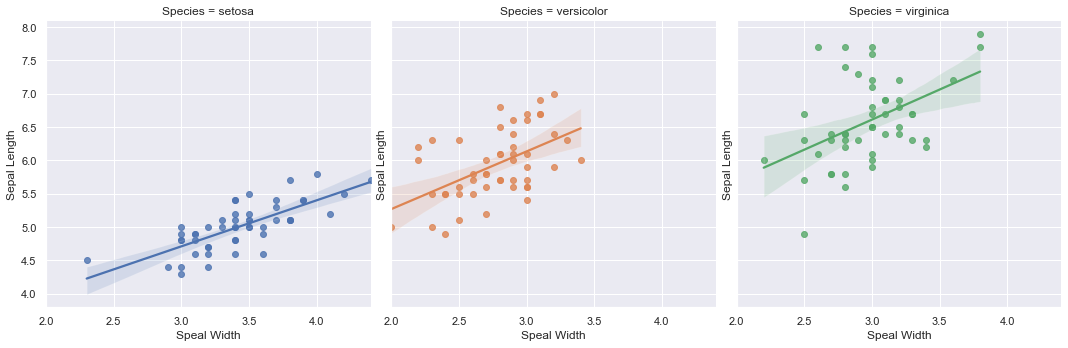

In [26]:
ax = sns.lmplot(x='sWidth', y='sLength', data=df, col='Species', hue='Species')
ax.set(xlabel='Speal Width', ylabel='Sepal Length')

In [27]:
corr_matrix = df.corr().abs()
corr_matrix

,sLength,sWidth,pLength,pWidth
sLength,1.000000,0.117570,0.871754,0.817941
sWidth,0.117570,1.000000,0.428440,0.366126
pLength,0.871754,0.428440,1.000000,0.962865
pWidth,0.817941,0.366126,0.962865,1.000000


In [30]:
import numpy as np
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper

,sLength,sWidth,pLength,pWidth
sLength,NaN,0.11757,0.871754,0.817941
sWidth,NaN,NaN,0.428440,0.366126
pLength,NaN,NaN,NaN,0.962865
pWidth,NaN,NaN,NaN,NaN


In [31]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(f'The feature that you can drop is {to_drop}')

The feature that you can drop is ['pWidth']


[]

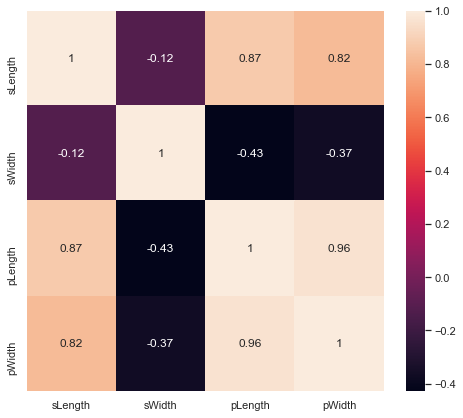

In [32]:
ax = plt.figure(figsize=(8,7))
ax=sns.heatmap(cor_matrix, annot=True)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.plot()

In [33]:
num_df = df[['sLength', 'sWidth', 'pLength', 'pWidth']]
num_df.head()

,sLength,sWidth,pLength,pWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
num_df.loc[(num_df['sLength'] == 5.0), 'sWidth'] = None

C:\Users\David\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
num_df.isnull().sum()

sLength     0
sWidth     10
pLength     0
pWidth      0
dtype: int64

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(num_df)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([5.8 , 3.  , 4.35, 1.3 ])

In [39]:
num_df_imputed = imputer.transform(num_df)

In [42]:
num_DF = pd.DataFrame(num_df_imputed, columns=num_df.columns, index=num_df.index)
num_DF.head()

,sLength,sWidth,pLength,pWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.0,1.4,0.2


In [43]:
num_DF.isnull().sum()

sLength    0
sWidth     0
pLength    0
pWidth     0
dtype: int64

In [44]:
df.head()

,sLength,sWidth,pLength,pWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [46]:
le = preprocessing.LabelEncoder()

In [48]:
df.Species = le.fit_transform(df.Species)
df.head()

,sLength,sWidth,pLength,pWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
features = ['sLength', 'sWidth', 'pLength','pWidth']
X = df[features]
y = df['Species']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [51]:
print('The shape of the training set is ',X_train.shape)

The shape of the training set is  (120, 4)


In [52]:
clf = DecisionTreeClassifier(max_depth = 2, random_state=0)

In [53]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [54]:
label0 = clf.predict(X_test.iloc[0].values.reshape(1,-1))

labels_1_to_10 = clf.predict(X_test[0:10])

predicitions = clf.predict(X_test)

In [55]:
accuracy = clf.score(X_test, y_test)
print(f'The Model Accuracy is {round(accuracy*100,2)}%')

The Model Accuracy is 96.67%


In [56]:
max_depth_vals = list(range(1,10))
accuracy_list = []
for max_depth in max_depth_vals:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracy_list.append(accuracy)
print(accuracy_list)
    

[0.5666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [57]:
depth_accuracies = list(zip(max_depth_vals, accuracy_list))
results = pd.DataFrame(data=depth_accuracies, columns=['max_depth', 'accuracy'])
results

,max_depth,accuracy
0,1,0.566667
1,2,0.966667
2,3,0.966667
3,4,1.000000
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Tree Depth')]

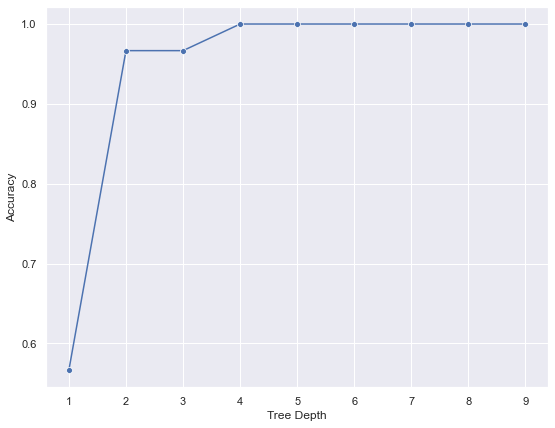

In [58]:
ax = sns.lineplot(x='max_depth', y='accuracy', data=results, marker="o")
ax.set(xlabel='Tree Depth', ylabel='Accuracy')

In [62]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(clf.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False)
importances

,feature,importance
3,pWidth,0.923
2,pLength,0.064
1,sWidth,0.013
0,sLength,0.000
